In [1]:
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier           
from sklearn.neighbors import KNeighborsClassifier            
from sklearn.ensemble import GradientBoostingClassifier       
from sklearn.neural_network import MLPClassifier
#from sklearn.model_selection import GridSearchCV 
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from random import seed
from random import randint

import statsmodels.formula.api as smf

In [2]:
#Abro el texto donde están los datos 
encuesta=pd.read_csv("../trabajo final macroencuesta/DA3242",delimiter= '\t', header=None)

In [3]:
#Gracias al libro de códigos, se crea  un diccionario con el nombre de las columnas y donde se realizan los cortes, para crear el DataFrame 
columnas={"ESTU": [1,4], "CUES": [5,9], "CCAA":[10,11], "PROV": [12,13], "MUN": [14,16], "TAMUNI": [17,17], "CAPITAL": [18,18], "DISTR": [19,20], "SECCION": [21,23],"ENTREV": [24,27], "P0A": [28,28], "P1": [29,29], "P2": [30,30], "P3": [31,31], "P4": [32,32], "P501": [33,33], "P502": [34,34], "P503": [35,35], "P601": [36,37], "P602": [38,39], "P603": [40,41],"P701": [42,43], "P702": [44,45], "P703": [46,47], "P801": [48,48], "P802": [49,49], "P803": [50,50], "P804": [51,51], "P805": [52,52], "P806": [53,53], "P807": [54,54], "P808": [55,55],"P809": [56,56], "P810": [57,57], "P811": [58,58], "P812": [59,59], "P813": [60,60], "P814":[61,61], "P815": [62,62], "P816": [63,63], "P9": [64,64], "P9A":[65,65], "P9B01": [66,67], "P9B02": [68,69],"P10": [70,71], "P10A": [72,73], "P1101": [74,75], "P1102": [76,77], "P1103": [78,79], "P1104": [80,81], "P1105": [82,83], "P1106": [84,85],"P12":[86,87], "P1301": [88,89], "P1302": [90,91], "P1303": [92,93], "P1304": [94,95], "P1305": [96,97], "P1306": [98,99], "P1307": [100,101],"P1308": [102,103], "P1309": [104,105], "P1310": [106,107], "P1311": [108,109], "P1312": [110,111], "P1313": [112,113], "P1314": [114,115],"P1315": [116,117], "P1316": [118,119], "P1317": [120,121], "P1318": [122,123], "P1319": [124,125], "P1320": [126,127], "P14": [128,129],"P15": [130,131], "P16": [132,133], "P17": [134,135], "P18": [136,136], "P18A": [137,138], "P19": [139,140], "P2001": [141,142], "P2002": [143,144],"P2003": [145,146], "P2004" :[147,148], "P2005": [149,150], "P2006": [151,152], "P2007": [153,154], "P2008": [155,156],"P2009": [157,158],"P2010": [159,160], "P2011": [161,162], "P2012": [163,164], "P2013": [165,166], "P2014": [167,168], "P2015": [169,170], "P2016": [171,172],"P2017": [173,174], "P2018": [175,176], "P2019": [177,178], "P2020": [179,180], "P21": [181,182], "P21A": [183,184], "P22": [185,185], "P23": [186,187],"P24": [188,188], "P24A": [189,190], "P25": [191,191], "P25A":[192,193], "P26":[194,194], "P27": [195,195], "P28": [196,196], "P29": [197,197], "P30": [198,198], "P30A": [199,199], "P31":[200,200],"E101": [201,202], "E102": [203,204], "E103": [205,206], "E2": [207,209], "E3": [210,210], "C1": [211,211], "C1A": [212,213], "PESO": [214,220],"P9BCOMR": [221,224], "P10R": [225,226], "P10AR": [227,228], "VOTOSIMG": [229,230], "P18AR": [231,232], "RECUERDO": [233,234], "P9BCOM": [235,238],"P14R": [239,240], "P15R": [241,242], "P16R": [243,244], "ESTUDIOS": [245,245], "PESOCCAA": [246,252]}

In [4]:
#se aplican los intervalos del diccionario en el DataFrame que hemos obtenido para poder crear las columnas
def get_intervals(x, a, b): 
    try: 
        return x[a:b]
    except: 
        print(x, a, b)

for a in columnas:
    encuesta[a] = encuesta[0].apply(lambda x: get_intervals(x, columnas[a][0]-1, columnas[a][1]))
encuesta.head()

,0,P813,P9A,P2009,P815,P2006,P2018,P2017,SECCION,P1308,...,P1320,P12,P814,P1302,P17,P502,P803,E101,P2020,C1A
0,3242 116 1 5951 0 0 01124321313 818 8121...,8,9,0,8,10,0,0,0,,...,,7,8,3,6,1,4,1,0,0
1,3242 216 1 5951 0 0 012333128 11898 1451...,8,1,0,8,8,0,0,0,,...,,7,8,2,2,2,5,1,0,0
2,3242 316 1 5951 0 0 014454799 1192219229...,5,0,0,5,98,0,0,0,,...,,1,5,0,98,9,5,1,0,0
3,3242 416 1 5951 0 0 01133317919 198 1 91...,8,0,0,8,10,0,0,0,,...,,3,8,5,4,7,3,4,0,0
4,3242 516 1 5951 0 0 099939138 1181212189...,8,0,0,8,6,0,0,0,,...,,2,8,3,98,3,3,4,0,0


In [5]:
#Eliminamos la columna 0, dado que ya no nos sirve
def drop_columna(data,columna,axis=1,inplace=True):
    return data.drop(columna, axis=1, inplace=True)
drop_columna(encuesta,0)

In [6]:
#convertimos las columnas en numericas 
def get_numeric(x):
    try:
        return int(x)
    except:
        return 0
for a in columnas:
    encuesta[a] = encuesta[a].apply(get_numeric)
    
encuesta.head()

,P813,P9A,P2009,P815,P2006,P2018,P2017,SECCION,P1308,CUES,...,P1320,P12,P814,P1302,P17,P502,P803,E101,P2020,C1A
0,8,9,0,8,10,0,0,0,0,1,...,0,7,8,3,6,1,4,1,0,0
1,8,1,0,8,8,0,0,0,0,2,...,0,7,8,2,2,2,5,1,0,0
2,5,0,0,5,98,0,0,0,0,3,...,0,1,5,0,98,9,5,1,0,0
3,8,0,0,8,10,0,0,0,0,4,...,0,3,8,5,4,7,3,4,0,0
4,8,0,0,8,6,0,0,0,0,5,...,0,2,8,3,98,3,3,4,0,0


In [7]:
#seleccionamos las columnas que no nos interesan y las eliminamos
columnas_para_eliminar=("ESTU","CUES","PROV","MUN","DISTR","SECCION","ENTREV","P501","P502","P503","P601","P602","P603","P701","P702","P703","P805","P806","P807","P808","P809","P810","P811","P812","P813","P814","P815","P816","P9","P9A","P9B01","P9B02","P10","P1101","P1102","P1103","P1104","P1105","P1106","P1305","P1306","P1307","P1308","P1309","P1310","P1311","P1312","P1313","P1314","P1315","P1316","P1317","P1318","P1319","P1320","P14","P15","P16","P17","P18","P18A","P2005","P2006","P2007","P2008","P2009","P2010","P2011","P2012","P2013","P2014","P2015","P2016","P2017","P2018","P2019","P2020","P21","P21A","P24A","P25A","P29","P30","P30A","P31","E101","E102","E103","E2","E3","C1","C1A","VOTOSIMG","RECUERDO","P9BCOM","P15R","P16R","P10AR","P9BCOMR","P10A","P24","P10R","P12","P18AR","PESO","PESOCCAA")
for a in columnas_para_eliminar:
    drop_columna(encuesta,a)

In [8]:
#se crean listas para ordenar el DataFrame
cols=["P1","P2","P3","P4","P801","P802","P803","P804","P1301","P1302","P1303","P1304","P2001","P2002","P2003","P2004","P23","TAMUNI","ESTUDIOS","CAPITAL","CCAA","P0A","P14R","P22","P25","P26","P27","P28","P19"]
colssincat=["P1","P2","P3","P4","P801","P802","P803","P804","P1301","P1302","P1303","P1304","P2001","P2002","P2003","P2004","P23","TAMUNI","ESTUDIOS"]

In [9]:
#Ordenamos el DataFrame
encuesta = encuesta[cols]

In [10]:
#Al ser una encuesta no existen valores nulos, en el sentido de no dato, pero si que existen valores como NS o NC.
#que son los que se entenderian por nulos, el problema es que la codificación puede ser por el valor 9 o 99 para NS
#por lo que se debe de especificar cada variable según sea la codificación
limpieza9=("ESTUDIOS","P0A","P1","P2","P3","P4","P801","P802","P803","P804","P23","P25","P26","P27","P28")
limpieza99=("P1301","P1302","P1303","P1304","P14R","P2001","P2002","P2003","P2004","P19")

In [11]:
#funcion para quitar los datos según el valor de una columna
def drop_file(data,pregunta,valor):
    data = data[data[pregunta] != valor]
    return data

In [12]:
#Se eliminan los NC-8 ó 88 y NS - 9 ó 99 de las variables
for a in limpieza9:
    encuesta = drop_file(encuesta,a,8)
    encuesta = drop_file(encuesta,a,9)
for a in limpieza99:
    encuesta = drop_file(encuesta,a,88)
    encuesta = drop_file(encuesta,a,98)
    encuesta = drop_file(encuesta,a,99)

In [13]:
#Se eliminan de la columna "ESTUDIOS", "7" que es otros
encuesta = drop_file(encuesta,"ESTUDIOS",7)
encuesta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9395 entries, 0 to 16191
Data columns (total 29 columns):
P1          9395 non-null int64
P2          9395 non-null int64
P3          9395 non-null int64
P4          9395 non-null int64
P801        9395 non-null int64
P802        9395 non-null int64
P803        9395 non-null int64
P804        9395 non-null int64
P1301       9395 non-null int64
P1302       9395 non-null int64
P1303       9395 non-null int64
P1304       9395 non-null int64
P2001       9395 non-null int64
P2002       9395 non-null int64
P2003       9395 non-null int64
P2004       9395 non-null int64
P23         9395 non-null int64
TAMUNI      9395 non-null int64
ESTUDIOS    9395 non-null int64
CAPITAL     9395 non-null int64
CCAA        9395 non-null int64
P0A         9395 non-null int64
P14R        9395 non-null int64
P22         9395 non-null int64
P25         9395 non-null int64
P26         9395 non-null int64
P27         9395 non-null int64
P28         9395 non-null in

In [14]:
#se reordenan el indice, dado que con las eliminaciones se ha desorganizado 
encuesta=encuesta.reset_index()

In [15]:
#se recodifica  la variable P19, en 3 categorias 0=Izquierda,1=Centro,2=Derecha
etiquetas=[0,1,2]
cortes = [0,3,6,10]
encuesta["ideologia"] = pd.cut(encuesta['P19'],cortes, labels=etiquetas)
encuesta["ideologia"] = pd.to_numeric(encuesta["ideologia"])

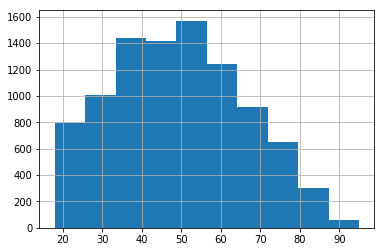

In [16]:
#también se recodifica  la variable P23,"Edad", en 4 categorias 0=Izquierda,1=Centro,2=Derecha
encuesta.P23.hist()
etiquetas=[0,1,2,3]
cortes = [0,30,45,65,100]
encuesta["P23"] = pd.cut(encuesta['P23'],cortes, labels=etiquetas)
encuesta["P23"] = pd.to_numeric(encuesta["P23"])

In [17]:
#eliminamos la columna "P19", para que no cree ruido e "index" que se creó al hacer el reindex
encuesta=encuesta.drop(columns="P19")
encuesta=encuesta.drop(columns="index")

In [18]:
#creamos en variables dummies las preguntas categoricas, eliminando la primera variable
encuesta_dum=pd.get_dummies(encuesta,columns=["CAPITAL","CCAA","P0A","P14R","P22","P23","P25","P26","P27","P28","ESTUDIOS"],drop_first=True)

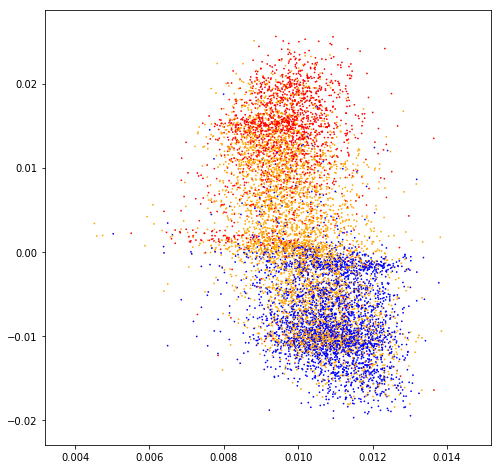

In [19]:
#realizo un PCA para visualizar como es la distribucción de todas las variables en un plano de dos ejes
from sklearn.decomposition import PCA
import matplotlib
import matplotlib.pyplot as plt
pca = PCA(n_components=2)
distribution_all=pca.fit(encuesta_dum.T) 
plt.figure(figsize=(8,8))
color= ['blue' if ideologia == 0 
        else 'orange' if ideologia == 1
        else 'red' if ideologia == 2
        else 'green' for ideologia in list(encuesta['ideologia'])]
plt.scatter(distribution_all.components_[0], distribution_all.components_[1],color=color,s=0.5)

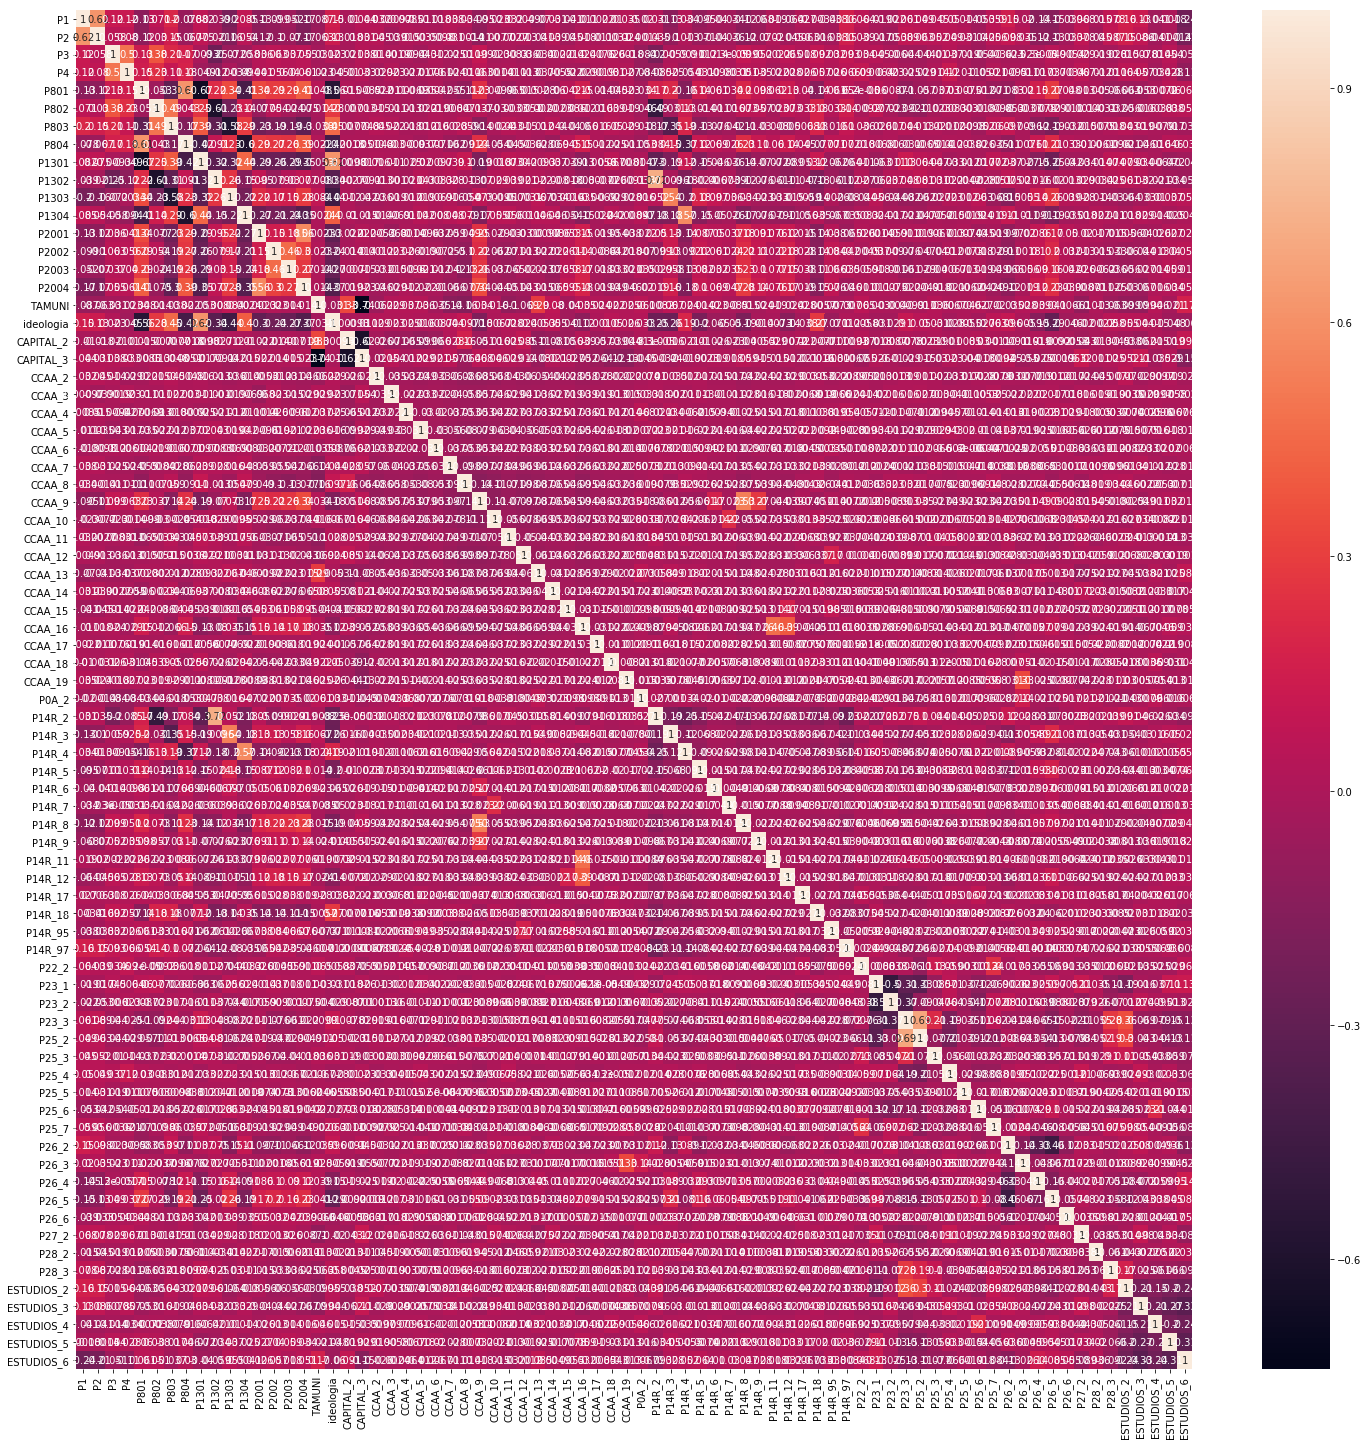

In [20]:
#veo la matriz de correlaciones, el problema es que existen correlaciones que pueden ser altas entre variables
#que han sido obtenidas de la categorización por lo que no se pueden eliminar
correlacion = encuesta_dum.corr()
fig, ax = plt.subplots(figsize = (25,25))
ax = sns.heatmap(correlacion, annot=True)
ax

In [21]:
#funcion para ver el número de elementos que tienen colinealidad entre las variables
def variablescolinealidad(data):
    columns_to_drop=[]                  
    for c in data.columns:
        for i in range(len(data.corr())):
            if abs(data.corr()[c][i])>0.9 and abs(data.corr()[c][i])<1:columns_to_drop.append(c)
    columns_to_drop=list(set(columns_to_drop))   
    return len(columns_to_drop)

In [22]:
#variablescolinealidad(encuesta_dum)

In [23]:
#función para poder realizar los distintos modelos
def modelos(data,columnadep):
    X=data.loc[:,data.columns!= columnadep]
    y=data[columnadep]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
    
    #modelos
    lr = LogisticRegression(solver ='liblinear',max_iter=500)
    cls = svm.SVC(gamma='auto', probability=True)
    neigh3 = KNeighborsClassifier(n_neighbors=3)
    neigh5 = KNeighborsClassifier(n_neighbors=5)
    bosque=RandomForestClassifier(n_estimators=500, criterion='gini')
    gnb = GaussianNB()
    #tree = tree.DecisionTreeClassifier()
    svc = SVC(kernel='rbf', gamma='scale')
    gbc=GradientBoostingClassifier()

    #entrenando
    cls.fit(X_train, y_train)
    lr.fit(X_train, y_train)
    neigh3.fit(X_train, y_train) 
    neigh5.fit(X_train, y_train) 
    bosque.fit(X_train, y_train) 
    #tree.fit(X_train, y_train)
    gnb.fit(X_train,y_train)
    svc.fit(X_train,y_train)
    gbc.fit(X_train, y_train)



    
    
    y_predlr = lr.predict(X_test)
    y_predcls = cls.predict(X_test)
    y_pred_neigh3= neigh3.predict(X_test)
    y_pred_neigh5= neigh5.predict(X_test)
    y_pred_bosque= bosque.predict(X_test)
    #y_pred_tree= tree.predict(X_test)
    y_pred_gnd = gnb.predict(X_test)
    y_pred_svc = svc.predict(X_test)
    y_pred_gbc=gbc.predict(X_test)

    
    print("Accuracy lineal:",metrics.accuracy_score(y_test, y_predcls))
    print("Accuracy logistics:",metrics.accuracy_score(y_test, y_predlr))
    print("Accuracy neigh3:",metrics.accuracy_score(y_test, y_pred_neigh3))
    print("Accuracy neigh5:",metrics.accuracy_score(y_test, y_pred_neigh5))
    print("Accuracy bosque:",metrics.accuracy_score(y_test, y_pred_bosque))
    #print("Accuracy tree:",metrics.accuracy_score(y_test, y_pred_tree))
    print("Accuracy gnd:",metrics.accuracy_score(y_test, y_pred_gnd))
    print("Accuracy svc:",metrics.accuracy_score(y_test, y_pred_svc))
    print("Accuracy gbc:",metrics.accuracy_score(y_test, y_pred_gbc))
    


    # Your code here:
    print("matriz de confusion lineal","\n",confusion_matrix(y_test, y_predlr))
    print("matriz de confusion vecino3","\n",confusion_matrix(y_test, y_pred_neigh3))
    print("matriz de confusion vecino5","\n",confusion_matrix(y_test, y_pred_neigh5))
    print("matriz de confusion bosque","\n",confusion_matrix(y_test, y_pred_bosque))
    print("matriz de confusion gnd","\n",confusion_matrix(y_test, y_pred_gnd))
    print("matriz de confusion svc","\n",confusion_matrix(y_test, y_pred_svc))
    print("matriz de confusion gbc","\n", confusion_matrix(y_test, y_pred_gbc))

In [24]:
#se visualizan los distintos modelos y se ven que los mejores son el modelo lineal, el RandomForestClassifier
# y el modelo gbc
modelos(encuesta_dum,"ideologia")

/home/vicente/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy lineal: 0.7456093666844066
Accuracy logistics: 0.7136774880255455
Accuracy neigh3: 0.6844065992549229
Accuracy neigh5: 0.7046301224055349
Accuracy bosque: 0.7477381585949974
Accuracy gnd: 0.5678552421500799
Accuracy svc: 0.7301756253326237
Accuracy gbc: 0.746673762639702
matriz de confusion lineal 
 [[433 187   1]
 [151 653  90]
 [  3 106 255]]
matriz de confusion vecino3 
 [[431 186   4]
 [182 612 100]
 [  9 112 243]]
matriz de confusion vecino5 
 [[449 167   5]
 [165 633  96]
 [  5 117 242]]
matriz de confusion bosque 
 [[458 162   1]
 [133 699  62]
 [  2 114 248]]
matriz de confusion gnd 
 [[453 137  31]
 [201 279 414]
 [  9  20 335]]
matriz de confusion svc 
 [[437 182   2]
 [130 689  75]
 [  3 115 246]]
matriz de confusion gbc 
 [[449 169   3]
 [128 691  75]
 [  3  98 263]]


In [25]:
#en un modelo lineal veo que existen variables que no son significativas, por lo que lo mejor para el modelo es eliminarlas
#además se puede apreciar como el modelo explica el 58,2 de la variable independiente
results = smf.ols('ideologia ~  P2  + P4 + P801 + P802 + P803+ P804 +P1301 + P1302 + P1303 +  P1304 + P2001 +P2002 + P2003 + P2004 + CCAA_2 +CCAA_3 + CCAA_4 + CCAA_5 + CCAA_6 + CCAA_7 + CCAA_8 + CCAA_9 + CCAA_10 + CCAA_11 + CCAA_12 + CCAA_13 + CCAA_14 + CCAA_15 + CCAA_16 + CCAA_17 + CCAA_18 + CCAA_19 + P0A_2   + P14R_2 + P14R_3 + P14R_4 + P14R_5 + P14R_6 + P14R_7 + P14R_8 + P14R_9 + P14R_11 +  P14R_12 + P14R_17 + P14R_18 + P14R_95 + P14R_97  + P26_2 + P26_3 + P26_4 + P26_5 + P26_6  + P23_1 + P23_2 + P23_3 ', data=encuesta_dum).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              ideologia   R-squared:                       0.585
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     239.3
Date:                Tue, 04 Jun 2019   Prob (F-statistic):               0.00
Time:                        12:12:20   Log-Likelihood:                -5953.7
No. Observations:                9395   AIC:                         1.202e+04
Df Residuals:                    9339   BIC:                         1.242e+04
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3659      0.060     22.919      0.0

In [26]:
#Se eliminan aquellas variables que no son significativas para el modelo
encuestatotal=encuesta_dum.drop(columns=["P1", "P3","P27_2","P28_2","P28_3","TAMUNI","ESTUDIOS_2","ESTUDIOS_3","ESTUDIOS_4","ESTUDIOS_5","ESTUDIOS_6","P22_2","P25_2" , "P25_3" , "P25_4" , "P25_5" , "P25_6", "P25_7","P27_2"  , "P28_2" , "P28_3"])

In [27]:
#Se visualizan los modelos sin las variables no representativas 
modelos(encuestatotal,"ideologia")

/home/vicente/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy lineal: 0.7408195848855774
Accuracy logistics: 0.7189994678020224
Accuracy neigh3: 0.7019691325172964
Accuracy neigh5: 0.7131452900478978
Accuracy bosque: 0.7551889302820649
Accuracy gnd: 0.5673230441724322
Accuracy svc: 0.739755188930282
Accuracy gbc: 0.7562533262373603
matriz de confusion lineal 
 [[421 195   1]
 [171 687  74]
 [  4  83 243]]
matriz de confusion vecino3 
 [[445 168   4]
 [197 642  93]
 [  9  89 232]]
matriz de confusion vecino5 
 [[452 162   3]
 [180 663  89]
 [  6  99 225]]
matriz de confusion bosque 
 [[449 168   0]
 [143 729  60]
 [  4  85 241]]
matriz de confusion gnd 
 [[454 138  25]
 [217 307 408]
 [  4  21 305]]
matriz de confusion svc 
 [[440 175   2]
 [151 710  71]
 [  4  86 240]]
matriz de confusion gbc 
 [[461 155   1]
 [152 708  72]
 [  4  74 252]]


In [28]:
#se realiza un grid para conocer cuales son los mejores parametro con el modelo 
X=encuestatotal.loc[:,encuestatotal.columns!='ideologia']
y=encuestatotal['ideologia']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [29]:
grid_param = {  
    'n_estimators': [10,100,1000],
    'criterion': ['gini', 'entropy'],   
    'bootstrap': [True, False]
}

In [30]:
gd_sr = GridSearchCV(estimator=RandomForestClassifier(n_estimators=100),  
                    param_grid=grid_param,
                     scoring='accuracy',
                     cv=3,
                     n_jobs=-1) 

In [31]:
gd_sr.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'bootstrap': [True, False], 'n_estimators': [10, 100, 1000], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [32]:
best_parameters = gd_sr.best_params_ 
best_parameters

{'bootstrap': True, 'criterion': 'gini', 'n_estimators': 1000}

In [33]:
best_result = gd_sr.best_score_  
best_result

0.7551889302820649

In [34]:
#Una vez conseguido un modelo que es óptimo se realiza un prueba con un valor random del test
def get_random_data(dataset):
    return dataset.sample()

In [35]:
random_encuesta=get_random_data(X_test)
random_encuesta

,P2,P4,P801,P802,P803,P804,P1301,P1302,P1303,P1304,...,P14R_95,P14R_97,P23_1,P23_2,P23_3,P26_2,P26_3,P26_4,P26_5,P26_6
7658,1,3,4,3,4,3,8,6,0,6,...,0,0,0,0,1,0,0,0,0,0


In [36]:
bosque1000e=RandomForestClassifier(n_estimators=1000, criterion='entropy')
bosque1000e.fit(X_train, y_train)
y_pred_bosque1000e= bosque1000e.predict(X_test)
print("Accuracy bosque1000e:",metrics.accuracy_score(y_test, y_pred_bosque1000e))

Accuracy bosque1000e: 0.7525279403938265


In [37]:
y_pred=bosque1000e.predict(random_encuesta)
y_real=y[random_encuesta.index[0]]
y_pred_proba=bosque1000e.predict_proba(random_encuesta)
print(y_pred,y_real,y_pred_proba)

[1] 1 [[0.063 0.469 0.468]]


In [38]:
#función para visualizar todos los datos
def displaydf(dataframe, cols = None, rows = 20):
    with pd.option_context("display.max_columns", cols):
        with pd.option_context("display.max_rows", rows):
            display(dataframe)
    return True

In [39]:
displaydf(random_encuesta)

,P2,P4,P801,P802,P803,P804,P1301,P1302,P1303,P1304,P2001,P2002,P2003,P2004,CAPITAL_2,CAPITAL_3,CCAA_2,CCAA_3,CCAA_4,CCAA_5,CCAA_6,CCAA_7,CCAA_8,CCAA_9,CCAA_10,CCAA_11,CCAA_12,CCAA_13,CCAA_14,CCAA_15,CCAA_16,CCAA_17,CCAA_18,CCAA_19,P0A_2,P14R_2,P14R_3,P14R_4,P14R_5,P14R_6,P14R_7,P14R_8,P14R_9,P14R_11,P14R_12,P14R_17,P14R_18,P14R_95,P14R_97,P23_1,P23_2,P23_3,P26_2,P26_3,P26_4,P26_5,P26_6
7658,1,3,4,3,4,3,8,6,0,6,10,5,3,6,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


True

In [40]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3)
temp_kmeans = kmeans.fit(encuestatotal)
encuestaKMeans=encuestatotal
encuestaKMeans['labels'] = temp_kmeans.labels_
encuestatotal.labels.value_counts()

2    3577
0    3426
1    2392
Name: labels, dtype: int64

In [41]:
bla= pd.crosstab(encuestaKMeans.ideologia, encuestaKMeans.labels)
bla["total"]=bla.T.sum()
bla

labels,0,1,2,total
ideologia,,,,
0,68,1249,1747,3064
1,1765,973,1783,4521
2,1593,170,47,1810


In [42]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
temp_AGG=cluster.fit_predict(encuestatotal)
encuestaAGG=encuestatotal
encuestaAGG['AGG'] = temp_AGG
encuestatotal.AGG.value_counts()

0    4108
1    3361
2    1926
Name: AGG, dtype: int64

In [43]:
bla2= pd.crosstab(encuestaAGG.ideologia, encuestaAGG.AGG)
bla2["total"]=bla.T.sum()
bla2

AGG,0,1,2,total
ideologia,,,,
0,1970,72,1022,6128
1,2062,1705,754,9042
2,76,1584,150,3620


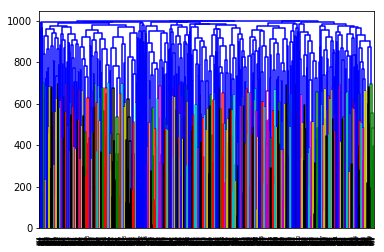

In [52]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering

customers_columns = [col for col in encuestatotal.columns.values if col not in ['ideologia']]
customers_sample = encuestatotal[customers_columns].sample(n=1000)
hier_clust = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='complete')
customers_hier = hier_clust.fit(customers_sample)

from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

def plot_dendrogram(model, **kwargs):

    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
    
plot_dendrogram(customers_hier)



In [45]:
modelos(encuestaKMeans,"labels")

/home/vicente/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy lineal: 0.982969664715274
Accuracy logistics: 0.971261309207025
Accuracy neigh3: 0.9606173496540713
Accuracy neigh5: 0.9643427354976051
Accuracy bosque: 0.9643427354976051
Accuracy gnd: 0.8685470995210218
Accuracy svc: 0.9787120808940926
Accuracy gbc: 0.9707291112293773
matriz de confusion lineal 
 [[672   8   8]
 [  9 439  22]
 [  6   1 714]]
matriz de confusion vecino3 
 [[670   9   9]
 [ 14 434  22]
 [ 13   7 701]]
matriz de confusion vecino5 
 [[672   8   8]
 [ 13 432  25]
 [  7   6 708]]
matriz de confusion bosque 
 [[668  10  10]
 [ 17 440  13]
 [ 10   7 704]]
matriz de confusion gnd 
 [[670  11   7]
 [102 331  37]
 [ 48  42 631]]
matriz de confusion svc 
 [[676   9   3]
 [  8 449  13]
 [  6   1 714]]
matriz de confusion gbc 
 [[669   9  10]
 [ 11 450   9]
 [ 13   3 705]]


In [46]:
encuestaKMeans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9395 entries, 0 to 9394
Data columns (total 60 columns):
P2           9395 non-null int64
P4           9395 non-null int64
P801         9395 non-null int64
P802         9395 non-null int64
P803         9395 non-null int64
P804         9395 non-null int64
P1301        9395 non-null int64
P1302        9395 non-null int64
P1303        9395 non-null int64
P1304        9395 non-null int64
P2001        9395 non-null int64
P2002        9395 non-null int64
P2003        9395 non-null int64
P2004        9395 non-null int64
ideologia    9395 non-null int64
CAPITAL_2    9395 non-null uint8
CAPITAL_3    9395 non-null uint8
CCAA_2       9395 non-null uint8
CCAA_3       9395 non-null uint8
CCAA_4       9395 non-null uint8
CCAA_5       9395 non-null uint8
CCAA_6       9395 non-null uint8
CCAA_7       9395 non-null uint8
CCAA_8       9395 non-null uint8
CCAA_9       9395 non-null uint8
CCAA_10      9395 non-null uint8
CCAA_11      9395 non-null uint8
CC

In [47]:
modelos(encuestaAGG,"AGG")

/home/vicente/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy lineal: 0.9606173496540713
Accuracy logistics: 0.944119212346993
Accuracy neigh3: 0.9771154869611496
Accuracy neigh5: 0.9755188930282065
Accuracy bosque: 0.9568919638105375
Accuracy gnd: 0.8626929217668973
Accuracy svc: 0.9552953698775944
Accuracy gbc: 0.9606173496540713
matriz de confusion lineal 
 [[793  24  25]
 [ 16 655  10]
 [ 25   5 326]]
matriz de confusion vecino3 
 [[824   7  11]
 [ 14 666   1]
 [  9   1 346]]
matriz de confusion vecino5 
 [[824   7  11]
 [ 13 666   2]
 [ 12   1 343]]
matriz de confusion bosque 
 [[796  26  20]
 [ 10 663   8]
 [ 14   3 339]]
matriz de confusion gnd 
 [[713  76  53]
 [ 18 657   6]
 [ 36  69 251]]
matriz de confusion svc 
 [[803  21  18]
 [ 15 660   6]
 [ 19   5 332]]
matriz de confusion gbc 
 [[813  16  13]
 [ 15 662   4]
 [ 22   4 330]]
